In [1]:
using BenchmarkTools
using Plots


include("../src/Cosmojuly.jl")
import .Cosmojuly as cj

In [52]:
cj.moments_C03(1)
cj.b_max(8e-3, cj.MM17Gamma1)
cj.number_stellar_encounter(8e-3, cj.MM17Gamma1)

2357

In [ ]:
r = range(0.1, 30, 1000)
plot(r, cj.number_stellar_encounter.(1e-3 .* r, cj.MM17Gamma1))

In [ ]:
cj.velocity_dispersion_spherical(8e-3, 0.5, cj.MM17Gamma1)

In [ ]:
m_array = 10.0.^range(-7, 1.80, 100)
plot(m_array, cj.stellar_mass_function_C03.(m_array), yscale=:log10, xscale=:log10)

In [ ]:

#σ = cj.velocity_dispersion_spherical(8e-3, 0.5, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)
v_array = 10.0.^range(7.710588749443367e-6, log10(7*σ), 200)
plot(v_array, cj.pdf_relative_speed.(v_array, σ, vstar), xscale=:log10)

In [ ]:
import Unitful: km, s, Gyr, K, Myr, NoUnits
import UnitfulAstro: Mpc, Gpc, Msun
import PhysicalConstants.CODATA2018: c_0, G as G_NEWTON


#σ = cj.velocity_dispersion_spherical(8e-3, 0.5, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)


b_m = cj.b_max(8e-3, cj.MM17Gamma1)
G_N = G_NEWTON * Msun / (km^2 * Mpc) * s^2 |> NoUnits 

v_max = 10^(1.80) * 2 * G_N / u / b_m
v_min = 1e-5 * 2 * G_N / u / b_m

println(v_min, " ", v_max)

v_array = 10.0.^range(log10(v_min), log10(v_max), 1000)
res = cj.stellar_mass_function_C03.((v_array * u * b_m)/(2*G_N)) .* cj.pdf_relative_speed.(v_array, σ, vstar) .* v_array
plot(v_array[res .> 0], res[res .> 0], yscale=:log10, xscale=:log10)


In [86]:
import Unitful: km, s, Gyr, K, Myr, NoUnits
import UnitfulAstro: Mpc, Gpc, Msun
import PhysicalConstants.CODATA2018: c_0, G as G_NEWTON

#σ = cj.velocity_dispersion_spherical(8e-3, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)
mstar_avg = cj.moments_C03(1)
v_avg     = 1.0/cj.average_inverse_relative_speed(σ, vstar)

η_array = 10.0.^range(-5, 3, 100)
#res = cj.cdf_η.(η_array, σ, vstar, mstar_avg, v_avg, cj.MM17Gamma1)
#plot(η_array[res .> 0], res[res .> 0], xscale=:log10)
println(cj.inverse_cdf_η(0.999999999, σ, vstar, mstar_avg, v_avg, cj.MM17Gamma1))

#y_array = 10.0.^range(-8, -0.00000001, 500)
#res = cj.inverse_cdf_η.(y_array, σ, vstar, mstar_avg, v_avg, cj.MM17Gamma1)
#plot(y_array[res .> 0], res[res .> 0], xscale=:log10, yscale=:log10)

1053.3908421016679


In [162]:
cj._save_inverse_cdf_η(8e-3, cj.MM17Gamma1)

true

## Monte Carlo on total the velocity kick

### General expressions

The velocity kick felt by a particle at position $\bf r$ inside a subhalo of tidal radius $r_t$ from an encounter with a star of mass $m_\star$ at speed $v$ and with an impact parameter $\bf b$ is

\begin{equation}
\delta {\bf v} = \left(\frac{2Gm_\star}{vb}\right) \left\{ b\frac{({\bf r} \cdot {\bf \hat e}_v){\bf \hat e}_v -  {\bf r} - {\bf b} }{r^2 - ({\bf r} \cdot {\bf \hat e}_v)^2 + b^2 + 2{\bf r}\cdot {\bf b}} + I(b, r_{\rm t}){\bf \hat e}_b  \right\}
\end{equation}
To simplify the expression we can decompose the fixed vector ${\bf r}$ as
\begin{equation}
{\bf r} = r (\cos \psi {\bf \hat e}_v + \sin \psi (\cos \varphi {\bf \hat n}_1 + \sin \varphi {\bf \hat n}_2) \quad {\rm with} \quad ({\bf \hat e}_v, {\bf \hat n}_1, {\bf \hat n}_2) \text{~an orthonormal basis}
\end{equation}
and we can do the Monte Carlo analysis for various values of $r$, $\psi$ and $\varphi$. Moreover we can now write ${\bf b}$ according to ${\bf \hat n}_1$ and ${\bf \hat n}_2$  as
\begin{equation}
{\bf b} = b (\cos \theta {\bf \hat n}_1 + \sin \theta {\bf \hat n}_2 )
\end{equation}
We can now write the component of $\delta {\bf v}$ alongside the two new basis vectors (note that $\delta {\bf v}$ is perpendicular to ${\bf \hat e}_v$)
\begin{equation}
\delta {v}_1 \equiv \delta {\bf v} \cdot {\bf \hat n}_1 = \left(\frac{2Gm_\star}{v_rb}\right) \left\{I(b, r_{\rm t}) \cos \theta - \frac{rb\sin \psi \cos \varphi + b^2 \cos \theta}{r^2\sin^2\theta_r + b^2 + 2rb\sin\psi\cos(\theta - \varphi )}\right\}
\end{equation}
and
\begin{equation}
\delta {v}_2 \equiv \delta {\bf v} \cdot {\bf \hat n}_2 = \left(\frac{2Gm_\star}{vb}\right) \left\{I(b, r_{\rm t}) \sin \theta - \frac{rb \sin\psi \sin\varphi + b^2 \sin \theta}{r^2\sin^2\theta_r + b^2 + 2rb\sin\psi\cos(\theta - \varphi) }\right\} \, .
\end{equation}
For a Monte Carlo run we fix $r_{\rm t}$, and $r \sin\psi < r_{\rm t}$. We then draw $v$, $b$, $m_\star$ and $\theta$ from their own distributions a number $\mathcal{N}_\star$ and finally sum the two velocity components. Eventually we do as much realisation as possible of a run to get enough statistics. The fact that the answer does not depend on $\cos \psi$ is due to the symmetry of the problem. By introducing $r_\psi = r \sin \psi$ we can further simplify
\begin{equation}
\delta {v}_1 = \left(\frac{2Gm_\star}{vb}\right) \left\{I(b, r_{\rm t}) \cos \theta - b\frac{r_\psi \cos \varphi + b \cos \theta}{r_\psi^2 + b^2 + 2r_\psi b\cos(\theta-\varphi)}\right\}
\end{equation}
and 
\begin{equation}
\delta {v}_2 = \left(\frac{2Gm_\star}{vb}\right) \left\{I(b, r_{\rm t}) \sin \theta - b\frac{ r_\psi \sin \varphi +  b \sin \theta}{r_\psi^2 + b^2 + 2r_\psi b\cos(\theta - \varphi)}\right\} \, .
\end{equation}


### Complex expression

To simpligy these expression we first introduce

\begin{equation}
\delta {w}_1 = I(b, r_{\rm t}) \cos \theta - b\frac{r_\psi \cos \varphi + b \cos \theta}{r_\psi^2 + b^2 + 2r_\psi b\cos(\theta-\varphi)}
\end{equation}
and 
\begin{equation}
\delta {w}_2 = I(b, r_{\rm t}) \sin \theta - b\frac{ r_\psi \sin \varphi +  b \sin \theta}{r_\psi^2 + b^2 + 2r_\psi b\cos(\theta - \varphi)} \, .
\end{equation}

We further define 
\begin{equation}
z = r_\psi e^{-i\varphi} + b e^{-i\theta}
\end{equation}
We then have
\begin{equation}
\begin{split}
z\bar z & = \left(r_\psi e^{-i\varphi} + b e^{-i\theta} \right)\left(r_\psi e^{+i\varphi} + b e^{+i\theta} \right) \\
& = r_\psi^2 + b^2 + r_\psi b \left(e^{-i\varphi}e^{+i\theta} + e^{-i\theta}e^{+i\varphi}\right) \\
& =  r_\psi^2 + b^2 + 2r_\psi b  \cos(\theta - \varphi)
\end{split}
\end{equation}

\begin{equation}
\begin{split}
z + \bar z & = \left(r_\psi e^{-i\varphi} + b e^{-i\theta} \right) + \left(r_\psi e^{+i\varphi} + b e^{+i\theta} \right) \\
& = r_\psi\left( e^{+i\varphi} + e^{-i\varphi} \right) + b\left(e^{+i\theta} + e^{-i\theta}\right) \\ 
& =  2r_\psi \cos \varphi  + 2 b \cos \theta
\end{split}
\end{equation}

\begin{equation}
\begin{split}
\bar z - z & = \left(r_\psi e^{+i\varphi} + b e^{+i\theta} \right) - \left(r_\psi e^{-i\varphi} + b e^{-i\theta} \right) \\
& = r_\psi\left( e^{+i\varphi} - e^{-i\varphi} \right) + b\left(e^{+i\theta} - e^{-i\theta}\right) \\ 
& =  2ir_\psi \sin \varphi  + 2i b \sin \theta
\end{split}
\end{equation}

Therefore we can write
\begin{equation}
\begin{split}
\delta {w}_1 & = I(b, r_{\rm t}) \cos \theta - \frac{b}{2}\frac{z  + \bar z}{z \bar z} \\
\delta {w}_2 & = I(b, r_{\rm t}) \sin \theta - \frac{b}{2i}\frac{\bar z  - z}{z \bar z}
\end{split}
\end{equation}
Once simplified this yields
\begin{equation}
\begin{split}
\delta {w}_1 & = I(b, r_{\rm t}) \cos \theta - \frac{b}{2}\left(\frac{1}{z} + \frac{1}{\bar z} \right) \\
\delta {w}_2 & = I(b, r_{\rm t}) \sin \theta - \frac{b}{2i}\left(\frac{1}{z} -  \frac{1}{\bar z} \right) 
\end{split}
\end{equation}

We not introduce the complex number $\delta w = \delta w_1 + i\delta w_2$. it can be written
\begin{equation}
\delta w =  I(b, r_{\rm t})e^{i\theta} - \frac{b}{z}
\end{equation}
Inserting back the expressions of $r_\psi$ we have
\begin{equation}
\delta w = \left[I(b, r_{\rm t}) - \frac{b}{r_\psi e^{i(\theta-\varphi)}+b} \right]e^{i\theta}
\end{equation}

-------------------

For the rest of the discussion we will introduce
\begin{equation}
\delta v_0 = \frac{2G \overline{m_\star}}{\overline{v} b_{\rm max}} \quad {\rm and} \quad \eta = \frac{m_\star}{\overline{m_\star}} \frac{\overline{v}}{v} 
\end{equation}
that has dimension of a velocity. Therefore, in complex notations
\begin{equation}
\begin{split}
\delta v & = \delta v_0 \frac{b_{\rm max}}{b}  \eta  \delta w \\
\end{split}
\end{equation}
The total velocity kick after $N$ encounters is
\begin{equation}
\Delta v = \delta v_0 b_{\rm max} \sum_{j=1}^{N}\left\{ \eta_j e^{i\theta_j}   \left[\frac{1}{b_j}I(b_j, r_{\rm t}) - \frac{1}{r_\psi e^{i(\theta_j -\varphi)}+b_j} \right] \right\}
\end{equation}
In terms of dimensionles variables we can define $z = r_\psi e^{-i\varphi} / r_{\rm s} = x \sin \psi e^{i\varphi}$, $\beta = b/r_{\rm s}e^{-i\theta}$ and
\begin{equation}
\mathcal{I}(\beta, x_{\rm t}) = \frac{I( |\beta|  r_{\rm s} , x_{\rm t} r_{\rm s})}{\beta}
\end{equation}
therefore it reduces to
\begin{equation}
\Delta v(z) = \delta v_0 \frac{b_{\rm max}}{r_s} \sum_{j=1}^{N}  \eta_j  \left[\mathcal{I}(\beta_j, x_{\rm t}) - \frac{1}{z + \beta_j} \right] 
\end{equation}

From the previous expression we can write down a probability distribution for both quantities knowing $b$ and $r_\parallel$. First we write down an expression for the probability of $X$
\begin{equation}
p_u(u) = \frac{b_{\rm max}}{2G}\int p_{m_\star}\left(\frac{vub_{\rm max}}{2G}\right) p_v(v) v {\rm d} v
\end{equation}
The probability distribution on $\delta v_\parallel$ and $\delta v_\perp$ are therefore
\begin{equation}
\begin{split}
p_{\delta v_\parallel}(\delta v_\parallel \, | \, b, r_\parallel) & =  \frac{b}{2\pi} \int p_X\left(\frac{b \delta v_\parallel}{w_\parallel(b, \theta_b, r_\parallel)}\right) \frac{1}{w_\parallel(b, \theta_b, r_\parallel)}{\rm d} \theta_b \\
p_{\delta v_\perp}(\delta v_\perp \, | \, b, r_\parallel) & =  \frac{b}{2\pi} \int p_X\left(\frac{b \delta v_\perp}{w_\perp(b, \theta_b, r_\parallel)}\right) \frac{1}{w_\perp(b, \theta_b, r_\parallel)}{\rm d} \theta_b 
\end{split}
\end{equation}
assuming that $\theta_b$ is uniformely distributed.

In [ ]:
subhalo = cj.halo_from_mΔ_and_cΔ(cj.nfwProfile, 1e-4, 40)
rt = cj.jacobi_radius(8e-3, subhalo, cj.MM17Gamma1)
r_array = 10.0.^range(-5, log10(rt / subhalo.rs ), 200) * subhalo.rs 

plot(r_array / subhalo.rs, cj.escape_velocity.(r_array, rt, subhalo), xscale=:log10)


In [151]:
using BenchmarkTools
using Plots


include("../src/Cosmojuly.jl")
import .Cosmojuly as cj

In [164]:
subhalo = cj.halo_from_mΔ_and_cΔ(cj.nfwProfile, 1e-4, 40)
rt = cj.jacobi_radius(8e-3, subhalo, cj.MM17Gamma1)
x_array = collect(range(0.1, 0.9999 * rt / subhalo.rs, 5))
ψ_array = [0, π/4, π/2]
φ_array = [0, π/4.0, π/2.0, 3.0*π/4.0, π,  2*π-π/4.0, 2*π-π/2.0, 2*π-3.0*π/4.0]

dw = cj.draw_velocity_kick_complex(x_array, ψ_array, φ_array, subhalo, 8e-3, nrep = 1000, nmem=1000000)

println(dw[3, 1, 1, :])

┌ Info: nturn
│   nturn = 2
└ @ Main.Cosmojuly.StellarEncounters /Users/gaetanfacchinetti/Documents/work/codes/env_DarkUniverse/Cosmojuly.jl/src/StellarEncounters.jl:249


ComplexF64[0.01645533702428444 - 2.1352959528820855e-5im, 0.0 - 0.0im, -0.022482709837438174 - 0.014382383919894796im, -0.12892908439762288 + 0.08715857612128254im, 0.0 - 0.0im, -4.242069135684053 + 4.016356936020053im, 0.0 - 0.0im, -0.0793497968156678 + 0.02627041768652165im, 0.07462602727147163 - 0.0055825820864887216im, -0.00016721871459501606 + 6.439644896669212e-5im, 0.0 - 0.0im, 0.0 - 0.0im, 0.0 - 0.0im, 0.04856087749781884 + 0.06129797189374221im, 0.06321406946221968 - 0.17198755409465702im, 0.0 - 0.0im, 0.024374925544608586 - 0.1138388342046613im, 0.0 - 0.0im, -0.01245410310675002 + 0.0011350170901800838im, 0.0 - 0.0im, 0.0 - 0.0im, 0.0 - 0.0im, 1.2777264144147167 - 1.6019536136777555im, 0.0 - 0.0im, -0.9736541026706416 + 2.8309313517420907im, -0.001229372621013851 + 0.00031541071493398405im, 0.0 - 0.0im, 0.0 - 0.0im, 0.0 - 0.0im, 22.278710546246757 + 75.23473381153555im, 0.0 - 0.0im, 0.019686750445190748 - 0.009180938829323713im, 0.0 - 0.0im, -0.016701889652373278 + 0.01801705

, 0.004082010304097144 + 0.04194507422818285im, 0.0 - 0.0im, 0.0 - 0.0im, 0.0 - 0.0im, -0.38251820631436845 + 0.13795659990042136im, 0.0 - 0.0im, 0.1584932953974606 + 0.5048592133897812im, 0.0 - 0.0im, 0.0 - 0.0im, -1.0832898772450989e-5 + 0.0002815238100461003im, -4.088889709668873e-5 - 0.00016867350618372839im, 0.0 - 0.0im, -0.44603892937805967 - 0.008251297796803513im, -0.12742187465243454 - 0.06210733311092976im, 4.155412356479652 + 0.6549810560178801im, -0.7536391744296642 + 0.7370924634659177im, -0.03383055347207408 - 0.0976254411907243im, -1.5366807801658806 + 0.5820481974846119im, 0.0 - 0.0im, 0.06704592509186004 - 0.21526529716602452im, 0.04474793131817495 - 0.0686094037873777im, 0.0 - 0.0im, 0.0 - 0.0im, 13.773786547621704 + 19.60892069236815im, -0.225923846065233 - 0.165065044701393im, 0.0 - 0.0im, -0.027971178110133228 + 0.07389047765871182im, 0.0 - 0.0im, 0.0 - 0.0im, 0.0033384762899551037 - 0.055097706255772455im, 0.003820957139887084 - 0.00905297748138056im, 0.0 - 0.0im,

, 0.0 - 0.0im, 0.0 - 0.0im, 0.6150431692815197 + 0.8181882114324456im, 0.0 - 0.0im, -1.23857756978876 - 2.6275218662470587im, 0.1581775520823086 + 0.031063032763274507im, 0.019768454283788442 + 0.05802093773899882im, 0.2712210889825953 + 0.11862343695774696im, 0.22454889220250726 + 0.08730771636529353im, 0.0 - 0.0im, -0.7183048850592122 - 0.5977397654769188im, 0.0 - 0.0im, -0.02337645996973332 - 0.01665910604030633im, 0.0 - 0.0im, 0.0 - 0.0im, 0.0 - 0.0im, 0.002254351787206111 + 0.0030038405153477187im, -0.10341644284496378 + 0.08239804468372913im, 0.0 - 0.0im, 0.0 - 0.0im, 0.0394694371338449 + 0.35066880090406954im, 0.0 - 0.0im, 0.0 - 0.0im, 0.0 - 0.0im, 0.02808073525365081 + 0.009139690388706006im, -0.6791250841508272 - 0.41392768297863397im, 0.025242428293423696 + 0.04791024709803266im, 0.006906408157431547 + 0.006709044259683102im, 0.0 - 0.0im, -0.012166265693322785 + 0.1413444694830104im, 0.03245953074011993 - 0.01016740114847779im, -3.126490793907164e-5 + 0.0005325376262713778im,

, 0.9552373711280958 - 0.3707586563370833im, 0.0 - 0.0im, 0.004482951325754608 - 0.0013391912608861547im, 0.0 - 0.0im, -0.05441390009280769 - 1.5725886951518025e-5im, 0.0 - 0.0im, -0.1358243066942206 + 0.2789337971196873im, 0.0 - 0.0im, 0.0 - 0.0im, 0.0 - 0.0im, 0.1979344896220969 + 0.04513951851248399im, 0.0 - 0.0im, -0.34565653356557463 + 0.06132072062367939im, 0.0 - 0.0im, 0.0 - 0.0im, -0.0008758099361401376 - 0.00013520753628934728im, -0.24633975828519553 - 0.32377526237926957im, -0.9592141560785534 - 0.6386352191769515im, 0.0 - 0.0im, 0.0 - 0.0im, 0.0 - 0.0im, -0.051592776263387354 - 0.10596936557698679im, -0.009066605582726138 + 0.0067767473259713745im, 0.0 - 0.0im, 0.0 - 0.0im, 1.4666159655254474 - 1.2917072747899874im]


In [169]:
dv = sqrt.(real.(dw).^2 + imag.(dw).^2)
println(real.(dv[1, 1, 1, :]))
println(real.(dv[1, 2, 1, :]))

[0.016455350878412375, 0.0, 0.02668942129109748, 0.1556255962080106, 0.0, 5.8417697309496575, 0.0, 0.08358543593301451, 0.07483454529209631, 0.00017918984667198424, 0.0, 0.0, 0.0, 0.07820230291777971, 0.1832368340193557, 0.0, 0.1164191443379549, 0.0, 0.012505716612356181, 0.0, 0.0, 0.0, 2.049107164222581, 0.0, 2.9936891338152782, 0.0012691890956014525, 0.0, 0.0, 0.0, 78.46404345492307, 0.0, 0.02172228765298448, 0.0, 0.024567609870083964, 0.010624881500303896, 0.3485915524683152, 0.0, 0.29591351749913325, 0.09981201303541633, 1.1135246967019643, 0.37136224867900647, 0.0124818324182217, 0.0, 0.045552157723465214, 5.385361449603461, 0.0, 0.004853718868590467, 0.0, 0.0, 0.0, 0.0, 0.0, 9.528689194278554, 0.0, 0.0, 0.0009210560868594414, 0.3291973968805959, 1.3547340736728124, 0.12689548434503228, 0.029508073054144726, 0.0, 0.3615139875275961, 0.0046339674662512625, 0.0, 0.09127017827589358, 0.006332029323147238, 0.0446687249498209, 0.0, 0.029713408171985686, 0.15098472664828225, 0.008036760

 0.0, 0.058777735546677486, 0.0, 0.22802148552361862, 0.002037897351063661, 0.025225892456436114, 0.6810788175534946, 0.0011208332616238267, 0.0, 0.022997646753766934, 0.01621842960978553, 0.442705131764593, 0.0, 0.00438201492075516, 0.021426794325363246, 0.0, 0.34884550851433577, 0.010676832918058684, 0.23298763008491363, 0.13813095538106396, 0.0, 0.0, 0.0, 0.0, 0.0, 2.097615622189011, 1.2759517448724111, 0.0, 0.0, 0.002492597100134894, 0.11558914860013843, 0.08616039659398535, 0.0, 0.015008323795468615, 0.10676315353658593, 0.0, 0.04059237478344419, 0.1759486484056656, 0.4691417157046252, 0.0, 1.6116821983175846, 1.0466986375473024, 0.0035454809045996033, 0.0, 0.00604367707411623, 0.0, 1.456671523787055, 0.022792412624994766, 0.0, 0.0, 0.0007627827912581924, 0.0008725202959700574, 0.0, 0.1707115999193004, 0.0, 0.0, 0.06265580574297555, 0.0, 0.015721417507900178, 0.5766070937938661, 0.0, 0.0, 1.6707512754348965, 0.0, 0.005578432500461797, 0.3158867390405309, 0.0, 0.0, 0.0, 0.254651188

, 1.0901659057014257, 0.09501295734856255, 0.1381378379088255, 0.17764347743880066, 0.49407425415467743, 0.588497131375716, 0.2710654319556825, 0.535752243062922, 0.43628128017208306, 0.4425234053060411, 2.5803959381773383, 0.3693501552387952, 0.2471393618946997, 0.385860786227314, 0.21074421188948586, 18.407909555801297, 0.14684392026058302, 0.038259472632560514, 1.1227666108589467, 0.17909908742035888, 0.23108816501000398, 0.2776925211093554, 0.29306009664634053, 0.4343973939196124, 30.714030306794314, 0.40094288984826915, 0.7878601266161495, 0.2950187397861252, 1.5087002222316794, 0.01686727339154816, 0.21033700814980005, 0.30207015710410645, 0.06100518311538324, 0.5317829353504351, 0.17384029301585877, 0.3392342709506691, 3.315775128226841, 0.6940061466350439, 0.1452869933653717, 0.8921576257880196, 16.044632819225356, 0.5195094372321345, 0.8740745202870129, 0.1201903748279374, 0.28505802289418203, 17.424656798373288, 0.22007781129568277, 1.787992466474291, 0.960017228487268, 0.254

, 3.1529639245567895, 0.21196093312833064, 4.118069933077827, 0.2982815304238931, 0.42530683570936856, 0.06258429994301036, 3.0132682748945463, 0.07670509700887278, 0.26863075733171854, 0.36539237388639234, 0.10308864005983567, 0.13191988619716288, 0.1360787662432324, 1.726857888294866, 0.8944025590389867, 0.6947511298343965, 2.070929103749539, 0.23953997243173095, 2.2495939152805384, 0.46582014239561337, 46.375717464681266, 0.548475438767985, 0.27858497742614635, 0.11823178186886732, 1.0233093143581744, 0.2739354336320736, 5.3802926022230935, 0.8628484806819222, 0.16196420378700654, 0.392285225596851, 0.362213214689561, 1.3793061139570129, 0.06707415928929593, 0.2722263071943555, 0.5125798462152904, 0.2872515873023885, 25.7763171325363, 0.8293822286209505, 4.4781753479485, 0.20671942701158116, 0.6487247285634844, 1.330606104442952, 0.2363865829750898, 3.140927482183931, 1.0374218394735044, 0.13682253205862904, 0.2596503702130817, 0.2929052310642366, 1.1608246519950471, 1.1852397513080

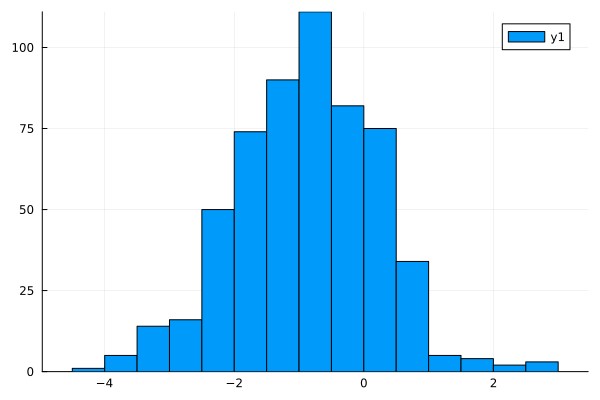

In [172]:
dv = sqrt.(real.(dw).^2 + imag.(dw).^2)
histogram([log10.(dv[5, 1, 1, :])], density=true)

In [30]:
subhalo = cj.halo_from_mΔ_and_cΔ(cj.nfwProfile, 1e-4, 40)
rt = cj.jacobi_radius(8e-3, subhalo, cj.MM17Gamma1)
r_array = collect(range(- 0.9999 * rt / subhalo.rs, 0.9999 * rt / subhalo.rs, 100))
dwx, dwy = cj.draw_velocity_kick(r_array, subhalo, 8e-3, nrep = 10000, nmem=1000000)

┌ Info: nturn
│   nturn = 12
└ @ Main.Cosmojuly.StellarEncounters /Users/gaetanfacchinetti/Documents/work/codes/env_DarkUniverse/Cosmojuly.jl/src/StellarEncounters.jl:181


([44.96445356023109 2.3174217853329466 … -182.80652873140104 108.06527890570669; 44.478572880551354 2.790951461378856 … -179.7733532014435 106.89888359642109; … ; -35.463155008385385 10.456193692354566 … 162.6206788052591 -383.8333481851706; -35.16860638303505 10.213831071488201 … 168.93095522868126 -381.9251249410619], [144.07281001230595 -49.81345865915518 … -8.656500081502141 119.02979520489723; 141.62960469084067 -48.14319941616723 … -7.899018187312922 117.55990756854699; … ; -71.64345892607285 61.781983787425084 … -99.94836147455162 1.1523402326265382; -72.26802461429472 63.55555564917149 … -105.07949120605623 6.735103024992352])

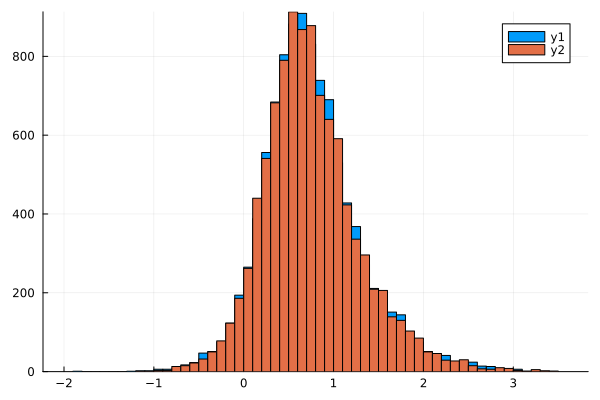

In [31]:
dv = sqrt.(real.(dw).^2 + imag.(dw).^2)
histogram([log10.(dv[end-1, :]), log10.(dv[2, :])], density=true)

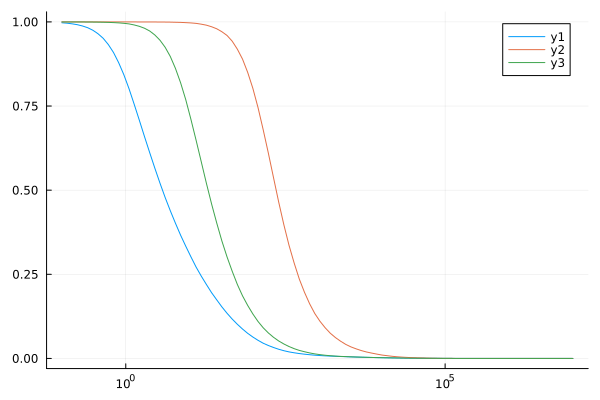

In [29]:
dv = sqrt.(dvx.^2 + dvy.^2)

dv_array   = 10.0.^range(-1, 7, 100)

inv_cumulative1 = [length(dv[1, dv[1, :] .> _dv]) for _dv in dv_array] ./ size(dv)[2]
inv_cumulative2 = [length(dv[end, dv[end, :] .> _dv]) for _dv in dv_array] ./ size(dv)[2]
inv_cumulative3 = [length(dv[5, dv[5, :] .> _dv]) for _dv in dv_array] ./ size(dv)[2]

#length(dv[1, dv[1, :] .< dv_array[end]])

plot(dv_array, inv_cumulative1, xscale=:log10)
plot!(dv_array, inv_cumulative2, xscale=:log10)
plot!(dv_array, inv_cumulative3, xscale=:log10)

In [50]:
import Unitful: km, s, Gyr, K, Myr, NoUnits
import UnitfulAstro: Mpc, Gpc, Msun
import PhysicalConstants.CODATA2018: c_0, G as G_NEWTON


#σ = cj.velocity_dispersion_spherical(8e-3, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)
mstar_avg = cj.moments_C03(1)
v_avg     = 1.0/cj.average_inverse_relative_speed(σ, vstar)

dv0 = 2*G_NEWTON * mstar_avg * Msun / (v_avg * km /s)  / (cj.b_max(8e-3, cj.MM17Gamma1) * Mpc) / (km/s) |> NoUnits

4.890105111674364e-6

In [ ]:

sigma = cj.velocity_dispersion.(r_array *  subhalo.rs, rt, subhalo)
v_esc = cj.escape_velocity.(r_array *  subhalo.rs, rt, subhalo)

vx = randn(10, 100000) .* sigma
vy = randn(10, 100000) .* sigma
vz = randn(10, 100000) .* sigma

v_end = @. sqrt((vx + dv0 * dvx)^2 + (vy + dv0 * dvy)^2 +  vz^2)

#println(v_esc)
#println(sigma)


percentage_bound = [100 - count(x-> x > v_esc[i], v_end[i, :])/100000 * 100 for i in 1:10]

plot(r_array, percentage_bound)

#println(1)
histogram([log10.(v_end[end, :]), log10.(v_end[1, :])], density=true)

In [40]:
#σ = cj.velocity_dispersion_spherical(8e-3, cj.MM17Gamma1)
#vstar = cj.circular_velocity(8e-3, cj.MM17Gamma1)
B = cj.draw_parameter_B(8e-3, σ, vstar, nstars = cj.number_stellar_encounter(8e-3, cj.MM17Gamma1) * cj.number_circular_orbits(8e-3, 0, cj.MM17Gamma1))

average velocity = 264.80074146256277 km/s | mstat_avg = 0.16793833797642496


51832-element Vector{Float64}:
 5.679460950594214e-20
 7.610253139338151e-19
 3.344876351350558e-19
 2.871236918726677e-19
 6.305841903673266e-20
 4.6808345189046075e-20
 1.613257938255146e-19
 3.2229580907531135e-20
 2.9088855390922464e-20
 2.668414588717963e-18
 ⋮
 1.0165019757523338e-19
 3.018835691184338e-20
 3.8925654024050985e-19
 1.810154208465635e-20
 1.62125729897396e-20
 2.225729138029712e-19
 6.857904057849731e-20
 2.629034719848046e-19
 1.7719531704334993e-19

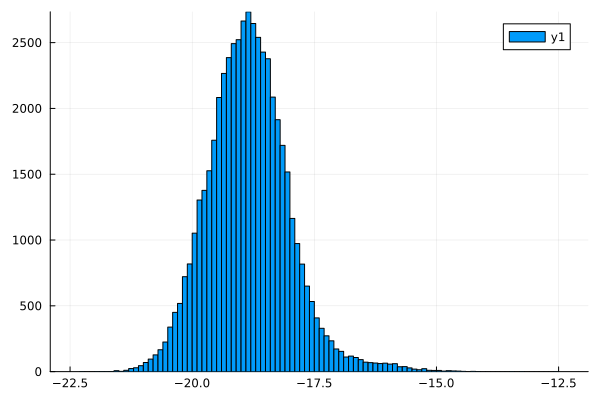

In [41]:
histogram(log10.(B), density=true)

In [43]:
cj.number_circular_orbits(8e-3, 0, cj.MM17Gamma1)

44

In [2]:
using BenchmarkTools

@benchmark 1.0/(1.0 + 2.0)

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  1.166 ns … 13.542 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.250 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.274 ns ±  0.221 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

                         █                                    
  ▂▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▇▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▂ ▂
  1.17 ns        Histogram: frequency by time        1.38 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [5]:
@benchmark 1.0/(1.0 + exp(2.0im))

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  1.167 ns … 17.417 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.250 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.274 ns ±  0.268 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

             ▁           █          ▆           ▄          ▂ ▁
  ▃▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁█ █
  1.17 ns      Histogram: log(frequency) by time     1.38 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [78]:
for k=1:2
    for j=1:4
        for i=1:3
            println(i + 3*(j-1) + 3*4*(k-1))
        end
    end
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [136]:
function one_to_three_dim(index::Int64, ni::Int64, nj::Int64, nk::Int64)

    ntot = ni * nj * nk 
    (index > ntot) && return false

    (index%ni != 0) && (i = index%ni)
    (index%ni == 0) && (i = ni)

    j = convert(Int64, (index - i)/ni % nj + 1)
    k = convert(Int64, (index - i - ni*(j-1))/(ni*nj) % nk + 1)
    
    return (i, j, k)
end


function one_to_three_dim(ni::Int64, nj::Int64, nk::Int64)

    ntot = ni * nj * nk 
    res = [(1, 1, 1)]

    for index = 2:ntot
        push!(res, one_to_three_dim(index, ni, nj, nk))
    end

    return res

end



function func(x::Vector{Float64}, ψ::Vector{Float64}, φ::Vector{Float64})
    nx = length(x) 
    nψ = length(ψ)
    nφ = length(φ)

    z = [x[i] * sin(ψ[j]) * exp(-im*φ[k]) for (i, j, k) in one_to_three_dim(nx, nψ, nφ)]
end

func (generic function with 1 method)

In [137]:
func([1, 2.0], [3, 4.0, 5], [6.0, 7])


12-element Vector{ComplexF64}:
 0.13549923859094465 + 0.03943111735788423im
  0.2709984771818893 + 0.07886223471576846im
 -0.7266592688575256 - 0.21146234626465502im
 -1.4533185377150513 - 0.42292469252931003im
 -0.9207305956792999 - 0.2679383039400445im
 -1.8414611913585999 - 0.535876607880089im
 0.10639069220927921 - 0.09271395410642026im
 0.21278138441855843 - 0.18542790821284053im
 -0.5705551073052852 + 0.49720909729424806im
 -1.1411102146105705 + 0.9944181945884961im
 -0.7229351724130583 + 0.6300003976398172im
 -1.4458703448261165 + 1.2600007952796344im

In [102]:
5 + 5*(2-1) + 5*6*(4-1)

100